In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ...  Fence Misc Feature Misc Val Mo Sold  \
0   NaN       IR1          Lvl  ...    NaN          NaN        0       5   
1   NaN       Reg          Lvl  ...  MnPrv          NaN        0       6   
2   NaN       IR1          Lvl  ...    NaN         Gar2    12500       6   
3   NaN       Reg          Lvl  ...    NaN          NaN        0       4   
4   NaN       IR1          Lvl  ...  MnPrv          NaN        0       3   

  Yr Sold Sale Type Sale Condition SalePrice           Year            Rooms  
0    2010       WD          Normal    215000  1999 or older  7 rooms or more  
1    2010       WD          Normal    105000  1999 or older  6 rooms or less  
2    2010       WD          Normal    172000  1999 or older  6 rooms or less  
3    2010       WD          Normal    244000  1999 or older  7 rooms or more  
4    2010       WD          Normal    189900  1999 or older  6 rooms or less  

[5 rows x 84 columns]

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Analyzing Numerical Variables

In [4]:
# Compute the correlation matrix
correlation_matrix = housing.corr()

# Get the correlations of each variable with 'SalePrice'
saleprice_correlation = correlation_matrix['SalePrice']

# Display the correlations in descending order
print(saleprice_correlation.sort_values(ascending=False))

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

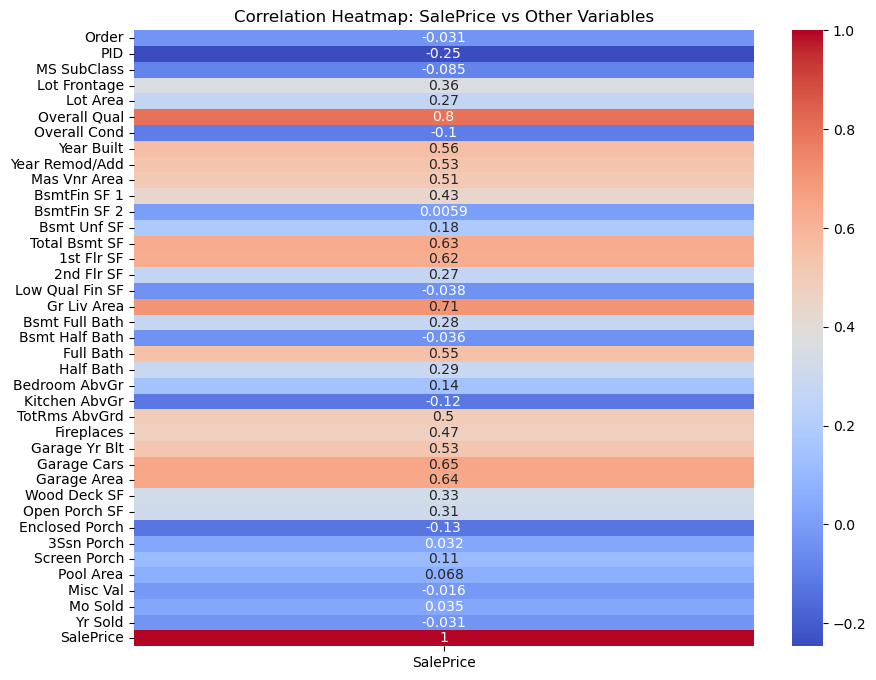

In [5]:
# Create a heatmap for 'SalePrice' correlations
plt.figure(figsize=(10, 8))
sns.heatmap(saleprice_correlation.to_frame(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap: SalePrice vs Other Variables')
plt.show()

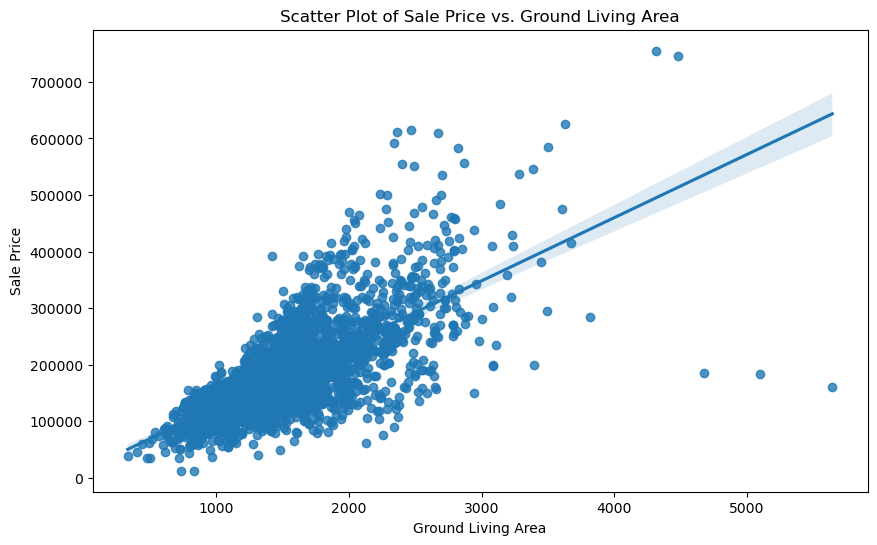

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gr Liv Area', y='SalePrice', data=housing)
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Sale Price vs. Ground Living Area')
plt.show()

Above plot shows the linear relationship between sales price and ground living area except for three houses which have ground living area more then 4600 sqft but they have unusually low sale prices. Let's analyze these three house.

In [7]:
# Select the rows of the dataset corresponding to the three houses with unusually low prices
unusual_houses = housing[housing['Gr Liv Area'] > 4600]

# Print the mentioned details of these houses
print(unusual_houses[['Gr Liv Area', 'SalePrice', 'Year Built', 'Overall Qual', 'Overall Cond', 'Neighborhood']])

      Gr Liv Area  SalePrice  Year Built  Overall Qual  Overall Cond  \
1498         5642     160000        2008            10             5   
2180         5095     183850        2008            10             5   
2181         4676     184750        2007            10             5   

     Neighborhood  
1498      Edwards  
2180      Edwards  
2181      Edwards  


Let's check the relation between sales price, overall quality and overall condition and find if there is any reasons that causes the unusually low price of these three house despite their greater Gr Liv Area.

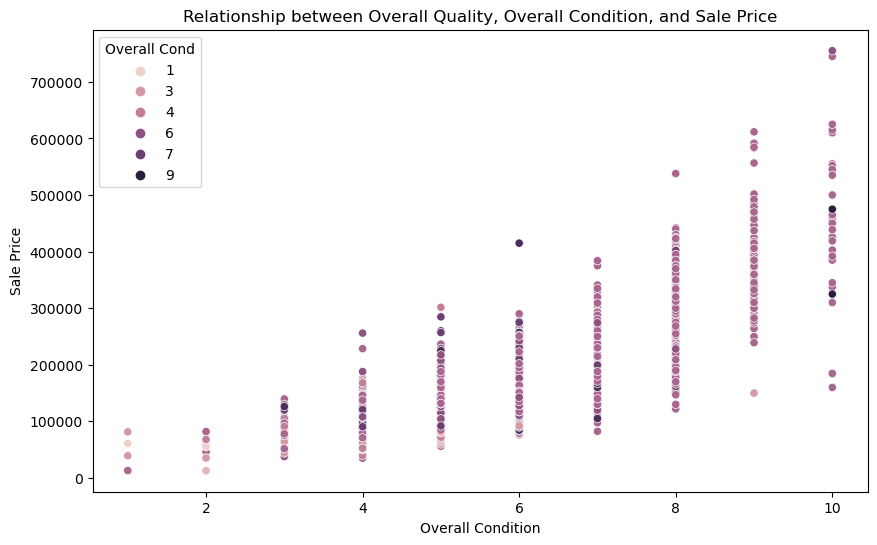

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Qual', y='SalePrice', hue='Overall Cond', data=housing)
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Relationship between Overall Quality, Overall Condition, and Sale Price')
plt.show()

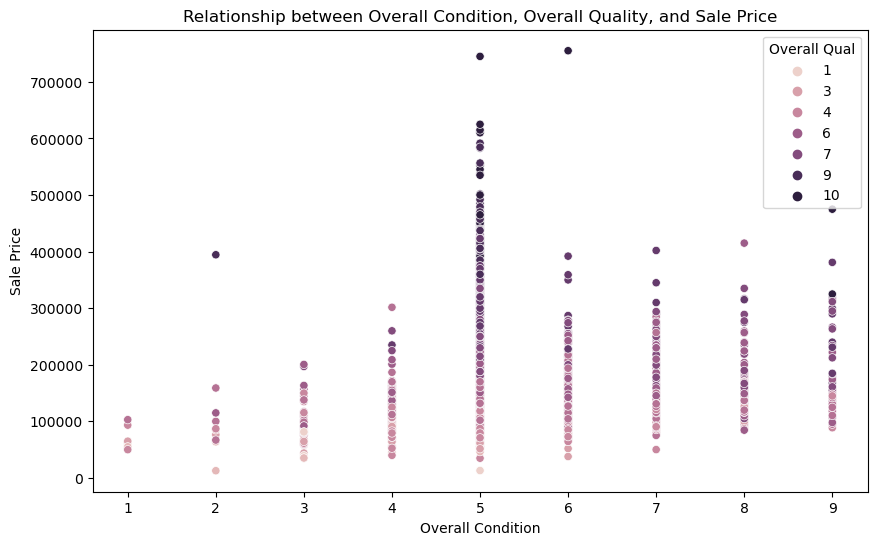

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Cond', y='SalePrice', hue='Overall Qual', data=housing)
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Relationship between Overall Condition, Overall Quality, and Sale Price')
plt.show()

From Above graph the selected parameters does not have any significant impact on sales price.

Let's check the correlation (> 0.5) of sale price with other variables for these three houses.

In [10]:
s_p = unusual_houses.corr()["SalePrice"].abs()
s_p1 = s_p[s_p > .5].sort_values(ascending=False)
s_p1

SalePrice         1.000000
Order             0.999526
Yr Sold           0.999486
Mo Sold           0.999486
Bsmt Full Bath    0.999486
Garage Cars       0.999486
Pool Area         0.999486
Lot Frontage      0.999140
Lot Area          0.998150
PID               0.962526
Bsmt Unf SF       0.933502
Gr Liv Area       0.915043
Open Porch SF     0.901389
Fireplaces        0.881610
Garage Area       0.878529
BsmtFin SF 1      0.872098
Total Bsmt SF     0.782249
Full Bath         0.527506
Garage Yr Blt     0.527506
Year Built        0.527506
Name: SalePrice, dtype: float64

In [11]:
# Display the correlations > 0.5 in descending order
s_p2 = saleprice_correlation[saleprice_correlation>0.5].sort_values(ascending=False)
s_p2

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
Name: SalePrice, dtype: float64

In [12]:
# Display the correlations > 0 in descending order
s_p3 = saleprice_correlation[saleprice_correlation < 0].sort_values(ascending=False)
s_p3

Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
PID               -0.246521
Name: SalePrice, dtype: float64

In [13]:
L1 = s_p1.index.tolist()
L2 = s_p2.index.tolist()
L3 = s_p3.index.tolist()

In [14]:
corr_var = list(set(L1+L2+L3))
index_saleprice = corr_var.index('SalePrice')
corr_var.pop(index_saleprice)

index_grlivarea = corr_var.index('Gr Liv Area')
corr_var.pop(index_grlivarea)
print(corr_var)

['Overall Cond', 'Enclosed Porch', 'Bsmt Half Bath', 'Garage Area', 'MS SubClass', '1st Flr SF', 'Full Bath', 'Order', 'Garage Cars', 'Lot Frontage', 'Lot Area', 'Kitchen AbvGr', 'Low Qual Fin SF', 'Mas Vnr Area', 'Fireplaces', 'Yr Sold', 'Bsmt Unf SF', 'Open Porch SF', 'Total Bsmt SF', 'PID', 'Garage Yr Blt', 'Year Built', 'Mo Sold', 'Pool Area', 'Misc Val', 'Overall Qual', 'Year Remod/Add', 'BsmtFin SF 1', 'Bsmt Full Bath']


The above list contains all the numercial variables that has moderate to strong positive and negative correlation with sale price let's analyze it by ploting scatter plot between SalePrice, Gr Liv Area and these correlation variables.

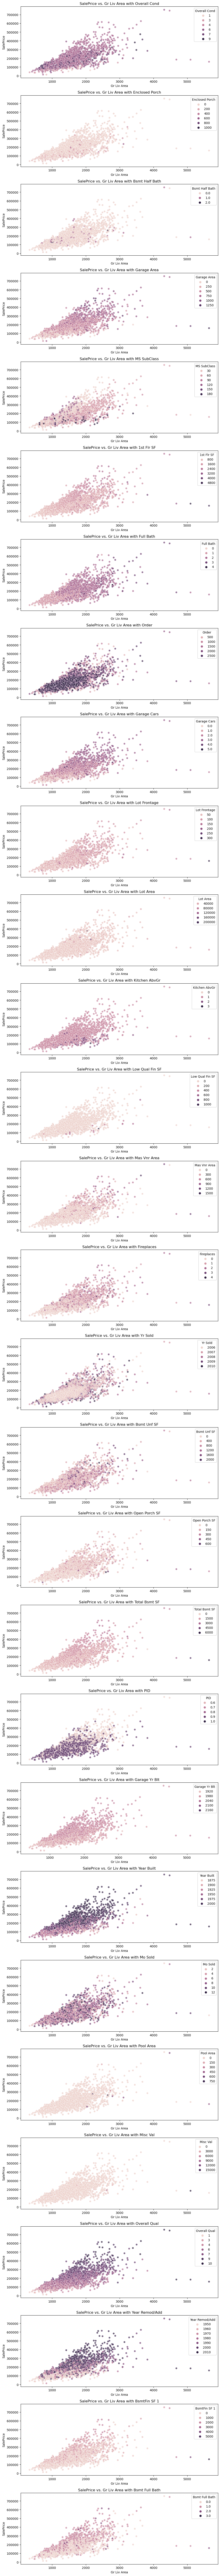

In [15]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=len(corr_var), ncols=1, figsize=(10, 4 * len(corr_var)))

# Loop through highly correlated variables and create scatter plots
for i, var in enumerate(corr_var):
    sns.scatterplot(data=housing, x='Gr Liv Area', y='SalePrice', hue=var, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'SalePrice vs. Gr Liv Area with {var}')
    axes[i].set_xlabel('Gr Liv Area')
    axes[i].set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()

## Significant Points of Numerical Variables

1. From above plot betweeen SalePrice and Gr Liv Area with Lot Frontage (Linear feet of street connected to property) one out of three unusuall house with index number 1498 has greater value of lot frontage this could be the reason of low price of that particular house.
2. From above plot betweeen SalePrice and Gr Liv Area with Misc Val (Value of miscellaneous feature) one out of three unusuall house with index number 2180 has very higher value as compare to others, this could be the reason of low price of that particular house.
3. From above plot betweeen SalePrice and Gr Liv Area with Total Bsmt SF (Total square feet of basement area) two out of three unusuall house with index number 1498 and 2180 has comparitively larger area basement area. It is understood that that if Gr Liv Area is greater, then basement area  will also be large this should not be the significant reason. This reason is also applicabale for SalePrice and Gr Liv Area with 1st Flr SF (First Floor square feet) and also with BsmtFin SF 1.
4. From above plot betweeen SalePrice and Gr Liv Area with Open Porch SF there are few points with greater value of open porch sf and lower price range and the three unusuall house comes in that category. This could be the reason also.

Note:
**These reasons are very week in observation. Mentioning those point is just to highlight there significant difference. These are some hypothesis which will be tested in hypothesis testing.**

## Analyzing Categorical Variables

Let's first separate categorical variables with strong negative and positive correlation with sale price.

In [16]:
# Create a DataFrame with the categorical columns and 'SalePrice'
categorical_columns = housing.select_dtypes(include=['object'])
categorical_columns['SalePrice'] = housing['SalePrice']
categorical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2930 non-null   object
 4   Land Contour    2930 non-null   object
 5   Utilities       2930 non-null   object
 6   Lot Config      2930 non-null   object
 7   Land Slope      2930 non-null   object
 8   Neighborhood    2930 non-null   object
 9   Condition 1     2930 non-null   object
 10  Condition 2     2930 non-null   object
 11  Bldg Type       2930 non-null   object
 12  House Style     2930 non-null   object
 13  Roof Style      2930 non-null   object
 14  Roof Matl       2930 non-null   object
 15  Exterior 1st    2930 non-null   object
 16  Exterior 2nd    2930 non-null   object
 17  Mas Vnr Type    2907 non-null   object
 18  Exter Qu

In [17]:
# One-hot encode the categorical columns
categorical_encoded = pd.get_dummies(categorical_columns)
categorical_encoded

SalePrice  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
0        215000                  0                  0             0   
1        105000                  0                  0             0   
2        172000                  0                  0             0   
3        244000                  0                  0             0   
4        189900                  0                  0             0   
...         ...                ...                ...           ...   
2925     142500                  0                  0             0   
2926     131000                  0                  0             0   
2927     132000                  0                  0             0   
2928     170000                  0                  0             0   
2929     188000                  0                  0             0   

      MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  \
0                     0             0             1             0   
1                     0             1             0             0   
2                     0             0             1             0   
3                     0             0             1             0   
4                     0             0             1             0   
...                 ...           ...           ...           ...   
2925                  0             0             1             0   
2926                  0             0             1             0   
2927                  0             0             1             0   
2928                  0             0             1             0   
2929                  0             0             1             0   

      Street_Grvl  Street_Pave  ...  Sale Condition_Abnorml  \
0               0            1  ...                       0   
1               0            1  ...                       0   
2               0            1  ...                       0   
3               0            1  ...                       0   
4               0            1  ...                       0   
...           ...          ...  ...                     ...   
2925            0            1  ...                       0   
2926            0            1  ...                       0   
2927            0            1  ...                       0   
2928            0            1  ...                       0   
2929            0            1  ...                       0   

      Sale Condition_AdjLand  Sale Condition_Alloca  Sale Condition_Family  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          0                      0                      0   
4                          0                      0                      0   
...                      ...                    ...                    ...   
2925                       0                      0                      0   
2926                       0                      0                      0   
2927                       0                      0                      0   
2928                       0                      0                      0   
2929                       0                      0                      0   

      Sale Condition_Normal  Sale Condition_Partial  Year_1999 or older  \
0                         1                       0                   1   
1                         1                       0                   1   
2                         1                       0                   1   
3                         1                       0                   1   
4                         1                       0                   1   
...                     ...                     ...                 ...   
2925                      1                       0                   1   
2926                      1   

In [18]:
# Calculate the correlation
correlation_with_saleprice = categorical_encoded.corr()['SalePrice']
pos_corr = correlation_with_saleprice[correlation_with_saleprice>0.5]
neg_corr = correlation_with_saleprice[correlation_with_saleprice<-0.5]

In [19]:
pos_corr

SalePrice             1.000000
Foundation_PConc      0.520966
Bsmt Qual_Ex          0.593567
Kitchen Qual_Ex       0.537561
Year_2000 or newer    0.512052
Name: SalePrice, dtype: float64

In [20]:
neg_corr

Exter Qual_TA        -0.590897
Kitchen Qual_TA      -0.526721
Year_1999 or older   -0.512052
Name: SalePrice, dtype: float64

In [21]:
# Variables that are strong positive and negative correlation with price
cat_var = ['Foundation', 'Bsmt Qual', 'Kitchen Qual', 'Exter Qual']

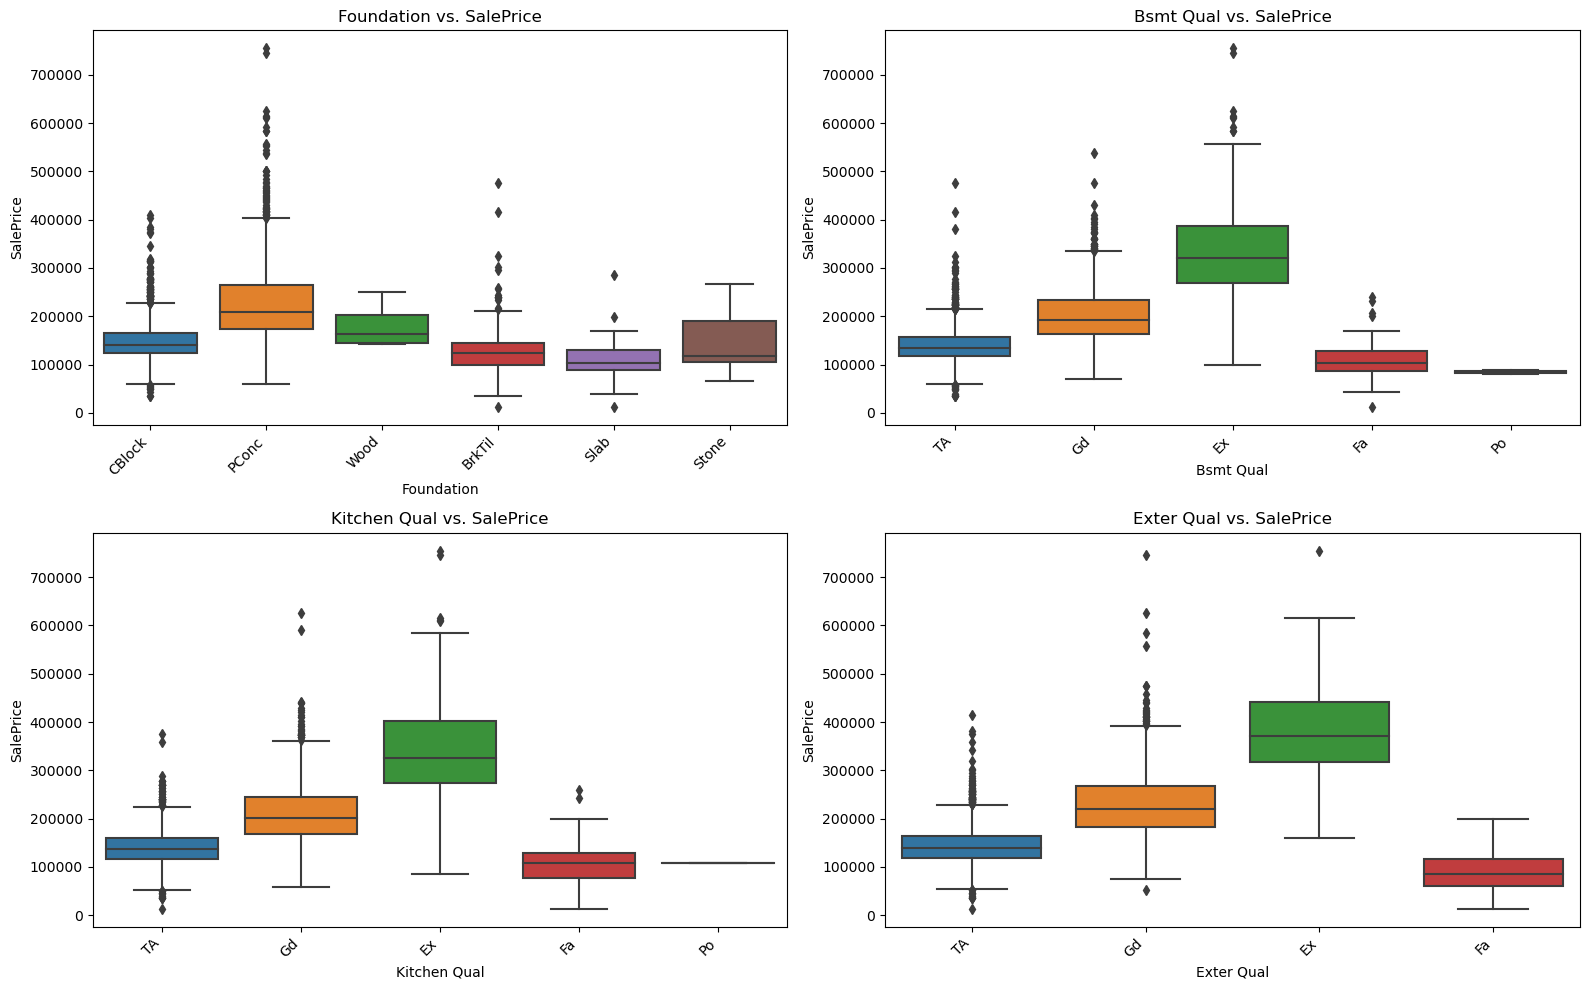

In [22]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# Loop through the variables and create box plots
for i, var in enumerate(cat_var):
    sns.boxplot(data=housing, x=var, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{var} vs. SalePrice')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

Slab from foundation, Po from Bsmt Qual, Fa from kitchen Qual and Exter Qual has comparitively low prices. With scatter plot let's get a clear picture of there impact on those three unusual houses.

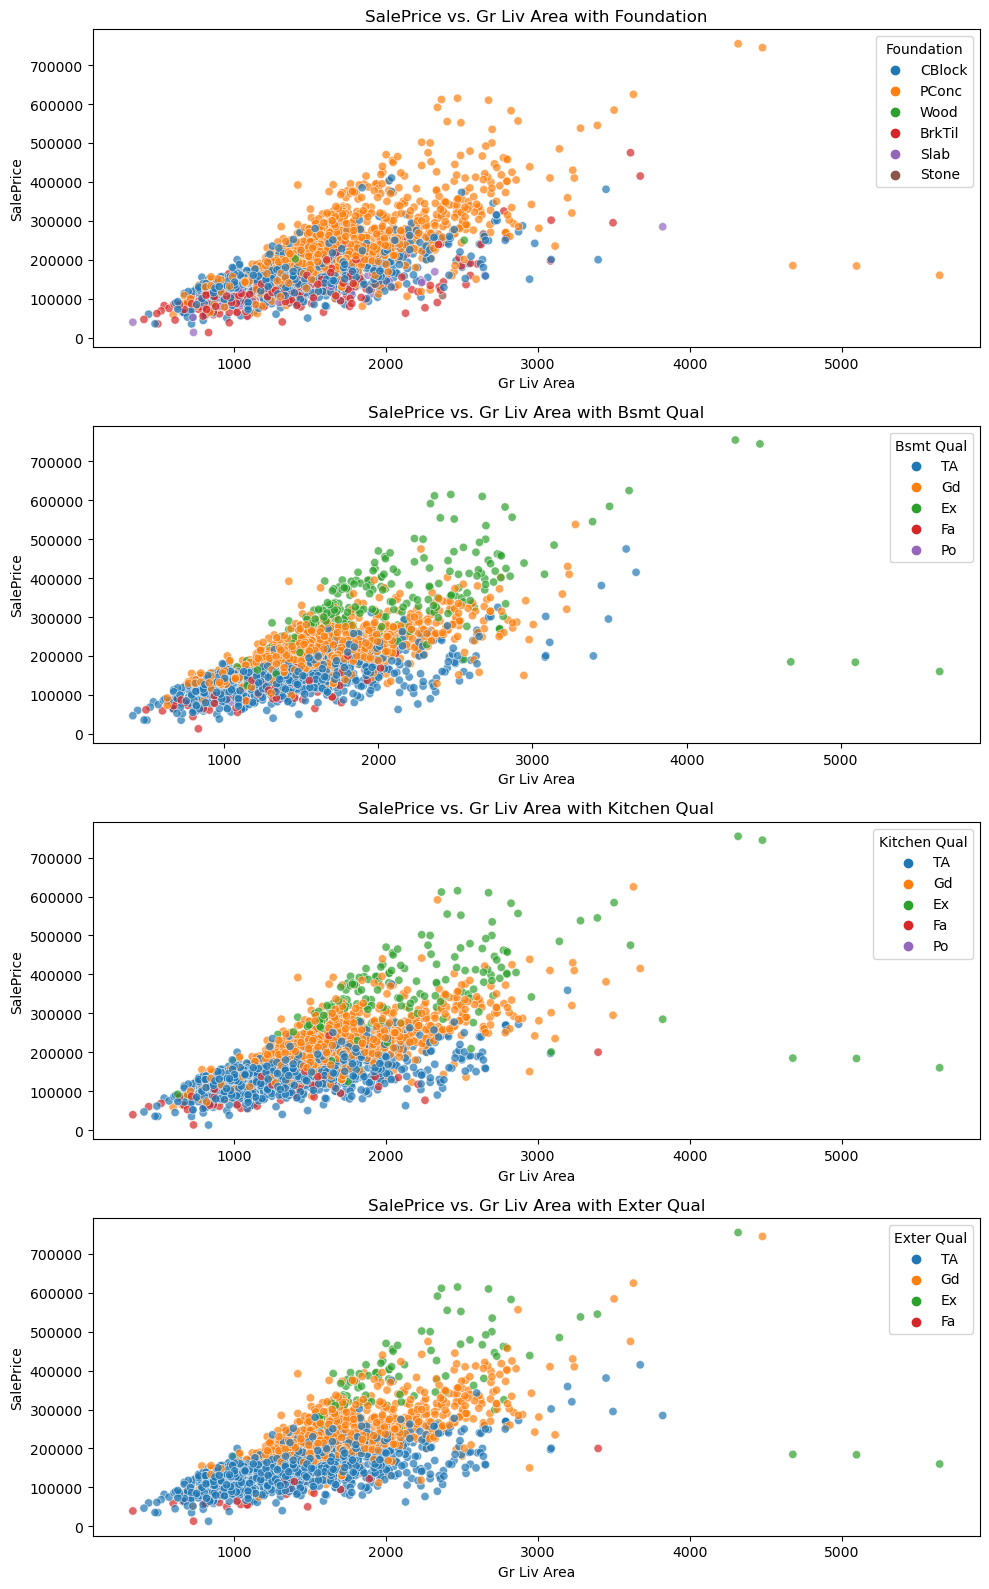

In [23]:
fig, axes = plt.subplots(nrows=len(cat_var), ncols=1, figsize=(10, 4 * len(cat_var)))

# Loop through selected variables and create scatter plots
for i, var in enumerate(cat_var):
    sns.scatterplot(data=housing, x='Gr Liv Area', y='SalePrice', hue=var, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'SalePrice vs. Gr Liv Area with {var}')
    axes[i].set_xlabel('Gr Liv Area')
    axes[i].set_ylabel('SalePrice')


# Adjust layout
plt.tight_layout()
plt.show()

No significant finding from scatter plots.

Those three houses have common neighborhood. Let's check if neighborhood has any impact on sale price.

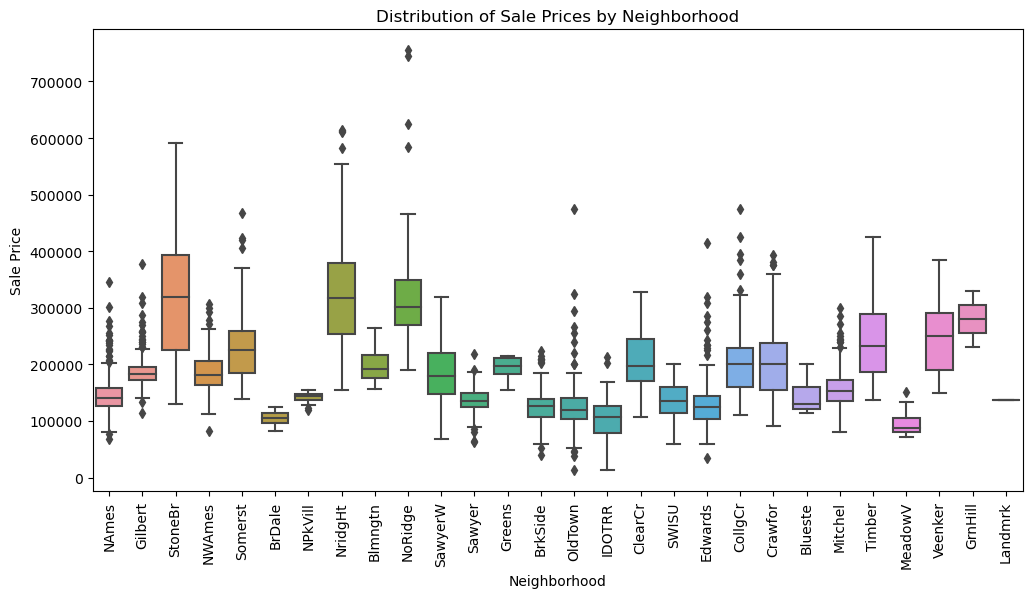

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Neighborhood')
plt.show()

From above plot it seems like where neighborhood is edward sale price is usually low. Let's plot the neighborhood = Edward with sale price and Gr Liv Area.

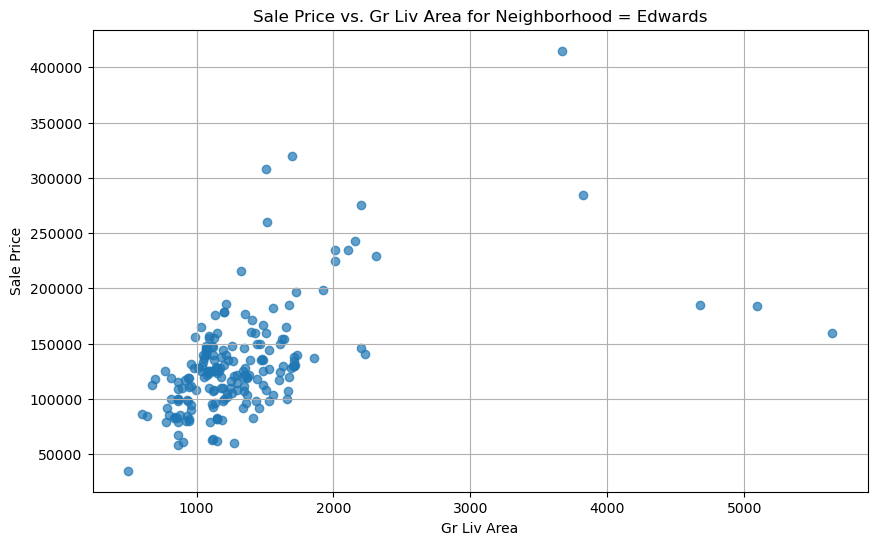

In [25]:
# Filter the data for the specific neighborhood
edward_neighborhood = housing[housing['Neighborhood'] == 'Edwards']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(edward_neighborhood['Gr Liv Area'], edward_neighborhood['SalePrice'], alpha=0.7)
plt.title('Sale Price vs. Gr Liv Area for Neighborhood = Edwards')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

From above it's seems like where neighborhood is Edward price of houses is usually low. From above graph we can conclude that the edward neighborhood is possiblily the reason of low price for these specific houses.

## Significant Points of Categorical Data.
1. From above observation it seems like edward neigborhood has significant impact on sales price of those three houses.

## Hypothesis Testing

* Null Hypothesis (H0): The mean sale prices of houses in the "Edward" neighborhood are equal to the mean sale prices of houses in other neighborhoods.
* Alternative Hypothesis (H1): The mean sale prices of houses in the "Edward" neighborhood are significantly different from the mean sale prices of houses in other neighborhoods.

The significance level (alpha) = 0.05

In [26]:
# Filter data for houses in the "Edward" neighborhood
edward_houses = housing[housing['Neighborhood'] == 'Edwards']

In [27]:
# Filter data for houses not in the "Edward" neighborhood
other_houses = housing[housing['Neighborhood'] != 'Edwards']

In [28]:
# Perform ANOVA test
result = stats.f_oneway(edward_houses['SalePrice'], other_houses['SalePrice'])

# Print the ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

# Interpret the result
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in sale prices between the 'Edward' neighborhood and other neighborhoods.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sale prices between the 'Edward' neighborhood and other neighborhoods.")

ANOVA Test Result:
F-statistic: 83.51957171517022
p-value: 1.1478007659106843e-19
Reject the null hypothesis. There is a significant difference in sale prices between the 'Edward' neighborhood and other neighborhoods.


# Conclusion

    The neighborhood is the reason for significantly low price of these three houses.